### Trainieren eines Neuronalen Netzes mit tensorflow (Klassifizierung) 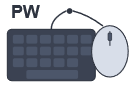

Für unser Beispiel mit dem Klassifizieren von Mohn und Enzian möchten wir ein Neuronales Netz aufbauen.

Dazu muss man erst entscheiden, wie viele Schichten mit jeweils wie vielen Neuronen man verwenden möchte.

Wir entscheiden uns willkürlich für eine versteckte Schicht (hidden Layer) mit 4 Neuronen.

```mermaid
flowchart LR
    I1((Breite))
    I2((Länge))
    H1(( ))
    H2(( ))
    H3(( ))
    H4(( ))    
    N1((Pflanze))
    I1 --> H1
    I1 --> H2
    I1 --> H3
    I1 --> H4
    I2 --> H1
    I2 --> H2
    I2 --> H3
    I2 --> H4
    H1 --> N1
    H2 --> N1
    H3 --> N1
    H4 --> N1

```

Mit tensorflow kann man dies recht leicht umsetzen.

In [ ]:
import tensorflow
import numpy

# Daten aus NN1.ipynb
breiteEnzian = [0.3, 0.9, 0.2, 0.4, 0.6]
laengeEnzian = [0.7, 0.2, 0.5, 0.2, 0.3]

breiteMohn = [1.0, 0.8, 1.2, 0.6, 1.3]
laengeMohn = [0.9, 0.6, 0.5, 0.8, 0.7]

target = numpy.array([1,1,1,1,1,0,0,0,0,0])  # 5 mal Enzian und dann 5 mal Mohn

# Wir müssen nun darauf achten, dass die Input-Daten genau in dieser Reihenfolgen vorliegen

input = numpy.array([
    [breiteEnzian[0],laengeEnzian[0]],
    [breiteEnzian[1],laengeEnzian[1]],
    [breiteEnzian[2],laengeEnzian[2]],
    [breiteEnzian[3],laengeEnzian[3]],
    [breiteEnzian[4],laengeEnzian[4]],
    [breiteMohn[0],laengeMohn[0]],
    [breiteMohn[1],laengeMohn[1]],
    [breiteMohn[2],laengeMohn[2]],
    [breiteMohn[3],laengeMohn[3]],
    [breiteMohn[4],laengeMohn[4]],
    ])


# Mit Sequential werden im Neuronalen Netz mehrere Schichten hintereinander geschaltet
# Die Dense-Layer ist eine vollvernetzte Schicht des neuronalen Netzes
model = tensorflow.keras.models.Sequential([
  tensorflow.keras.layers.Dense(4, activation='relu', input_shape =(2,)),    #  2 Eingangsneuronen und 4 Neuronen im hidden Layer
  tensorflow.keras.layers.Dense(1, activation='relu')        #  1 Output-Neuron
])

#Modelparameter anzeigen
model.summary()

In [ ]:
# Für das Modell geben wir noch die Optimierungsfunktion an (Wie soll das Minimum ermittelt werden),
# dann geben wir die Fehlerfunktion loss='mse' (MSE steht für mean squared error, also unseren quadratischen Fehler)
# und die Metrik für die Evaluation, hier metrics=['mae'] (MAE steht für den mittleren absoluten Fehler), an.
model.compile(optimizer='rmsprop',   # z.B. 'adam' oder 'rmsprop'
              loss='mse',
              metrics=['mae'])

In [ ]:
# Wir übergeben die Trainingsdaten an die Fit-Methode. 
# Darin ist der Lernvorgang, d.h. die Suche nach dem Minimum der Fehlerfunktion, programmiert.
# Es wird z.B. für 500 Epochen trainiert.
history = model.fit(input, target, epochs=500);

In [ ]:

# In history sind die "loss"-Werte (Fehlermaß) zu jeder Epoche abgespeichert.
# Damit kann der Verlauf des Trainings ein Stück weit nachvollzogen werden.

# Wir schauen uns den Fehler am Anfang an:
fehler = history.history['mae'];
print(f"Fehler (MAE) am Anfang: {fehler[0]}")
# und dann vergleichen wir den Wert mit dem Fehler am Ende des Lernvorgangs:
print(f"Fehler (MAE) nach dem letzten Lernschritt: {fehler[-1]}")

In [ ]:
import matplotlib.pyplot as plt
y1 = history.history["mae"]
plt.plot(y1, color="red")
plt.xlabel("Trainingsepoche")
plt.ylabel("Fehler (in Eiskugeln)")
plt.title("Fehlerkurve (MAE)")
plt.show()